<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-Pabloacostatec-A01794035-/blob/main/Semana_7_Data_Analysis_with_Python_A01794035.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Semana 7: Data Analysis with Python

Juan Pablo Acosta López

Un modelo se entiende como una ecuación que trata de predecir el valor de algo dado un conjunto de variables

Regresión lineal simple: se refie a un modelo que trata de demostrar la relación entre dos variables

Regresión lineal múltiple: se refie a un modelo que trata de demostrar la relación entre una variable independiente y varias variables dependientes que pudiesen ser relevantes para la predicción.

Los parámetros son los pesos que se les dan a cada una de las variables dependientes

se puede usar el modelo lm para hacer el modelo.
La función "fit" genera los parámetros o vectores dados los valores
La función "predict" genera las predicciones según los datos de entrada

Evaluación del modelo usando visualización:

Se recomienda usar "regplot" de seaborn para hacer el gráfico de resultado de regresión.

Otro plot importante es el plot de residuales los cuales te pueden dar referencia si la relación entre un modelo es lineal o no.

Se puede usar también un distribution plot "distplot" para poder comparar los valores de predicción vs los valores reales y poder evaluar nuestro modelo.

Regresión polinomial y pipelines

La regresión polinomial sirve para predecir relaciones que no son lineales si no cuadráticas.

para hacer esto se usa "Polyfit" o "polinomialfeature" de la librería de scikit learn

Generalmente se hace pre-procesamiento a los datos antos de pasarlo a un modelo.

Para tener un orden en los pasos de pre-procesamiento, se recomienda hacer un pipeline, un pipeline te permite poner todos los pasos de pre-procesamiento en una misma función, por ejemplo:

1.- Estandarización

2.- inputación

3.- one hot encoder

Medidas de evaluación

Para medir el desempeño del modelo se recomienda usar métricas ya conocidas, por ejempo:

1.- R2

2.- MSE

3.- MAE

4.- MAPE

Se recomienda usar medidas de error que ya vienen en las librerías de python

Predicción y toma de decisiones.

Se suelen ocupar visualizaciones como un scatterplot o un plot de distribución para saber que las predicciones hacen sentido

Laboratorio

In [3]:
input = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns  
from sklearn.linear_model import LinearRegression

#Transform into DF
df = pd.read_csv(input)
df

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0



Question #1 a):

Create a linear regression object called "lm1".


In [4]:
lm1 = LinearRegression()
lm1

LinearRegression()


Question #1 b):

Train the model using "engine-size" as the independent variable and "price" as the dependent variable?


In [5]:
lm1.fit(df[['engine-size']], df[['price']])
lm1

LinearRegression()


Question #1 c):

Find the slope and intercept of the model.


In [7]:
print(lm1.coef_)
print(lm1.intercept_)

[[166.86001569]]
[-7963.33890628]



Question #1 d):

What is the equation of the predicted line? You can use x and yhat or "engine-size" or "price".


In [9]:
Price=-7963.34 + 166.86*df['engine-size']


Question #2 a):
Create and train a Multiple Linear Regression model "lm2" where the response variable is "price", and the predictor variable is "normalized-losses" and "highway-mpg".


In [10]:
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses' , 'highway-mpg']],df['price'])  

LinearRegression()


Question #2 b):
Find the coefficient of the model.


In [11]:
lm2.coef_

array([   1.49789586, -820.45434016])

Regression plot

(0.0, 47414.1)

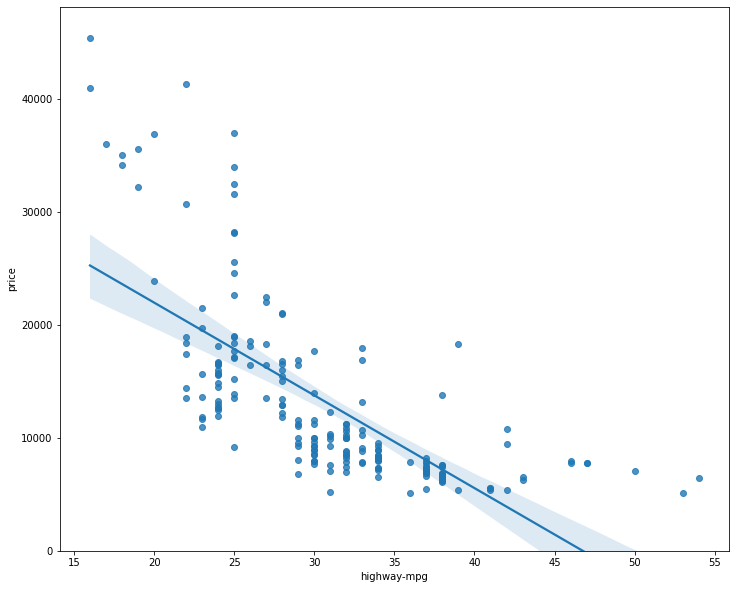

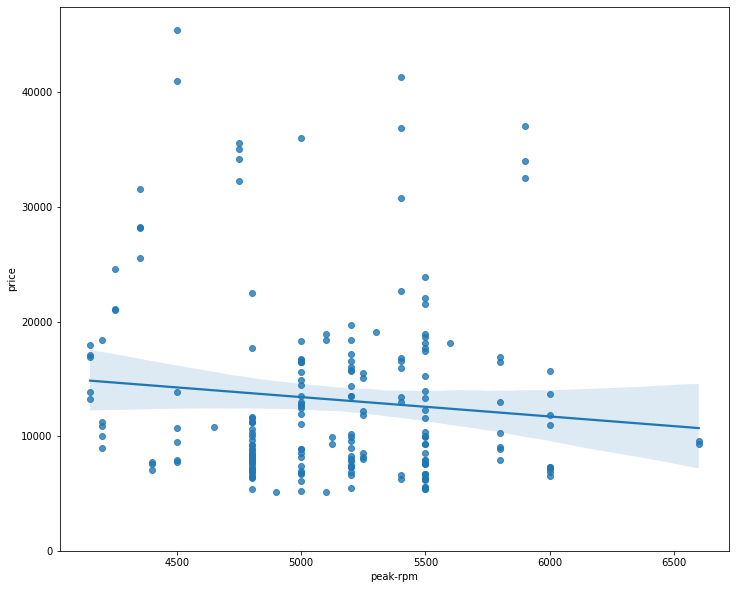

In [12]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)


Question #3:
Given the regression plots above, is "peak-rpm" or "highway-mpg" more strongly correlated with "price"? Use the method ".corr()" to verify your answer.


In [13]:
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


Residual plot

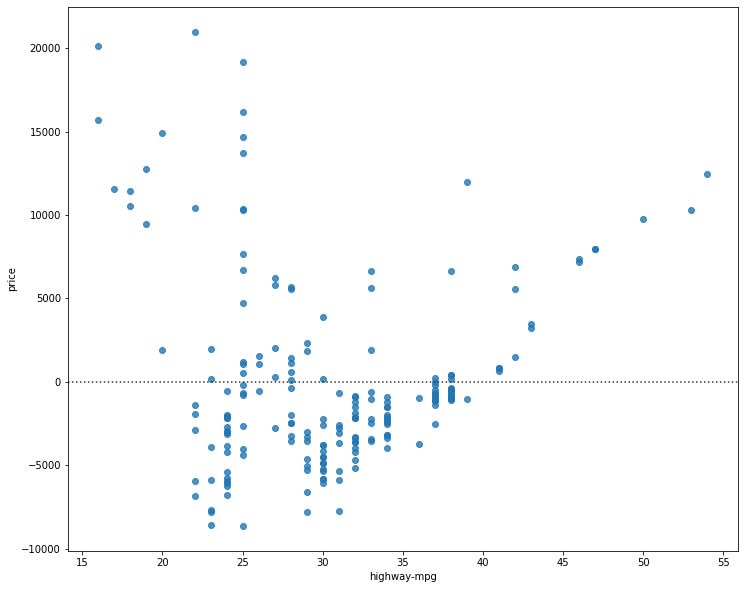

In [14]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'],y=df['price'])
plt.show()


Question #4:
Create 11 order polynomial model with the variables x and y from above.


In [15]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


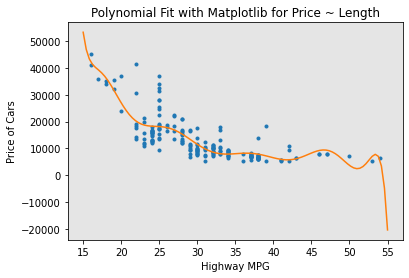

(201, 15)

In [18]:
x = df['highway-mpg']
y = df['price']

f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

from sklearn.preprocessing import PolynomialFeatures

pr=PolynomialFeatures(degree=2)
pr

Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

Z_pr=pr.fit_transform(Z)
Z.shape
Z_pr.shape


Question #5:
Create a pipeline that standardizes the data, then produce a prediction using a linear regression model using the features Z and target y.


In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

Fin de módulo